In [ ]:
# !pip install qiskit==1.4.4 qiskit-machine-learning==0.8.4 pylatexenc

In [ ]:
import warnings
warnings.filterwarnings('ignore')


##### **1. load and preprocess dataset**

---

In [ ]:
from sklearn.datasets import load_iris

# load dataset
# ----------------------
iris_data = load_iris()
# print(iris_data.DESCR)

features = iris_data.data
labels = iris_data.target
# print(features.shape)
print(features[0])
# print(labels.shape)

[5.1 3.5 1.4 0.2]


In [ ]:
# normalization
# ----------------------
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)
print(features[0])

[0.22222222 0.625      0.06779661 0.04166667]


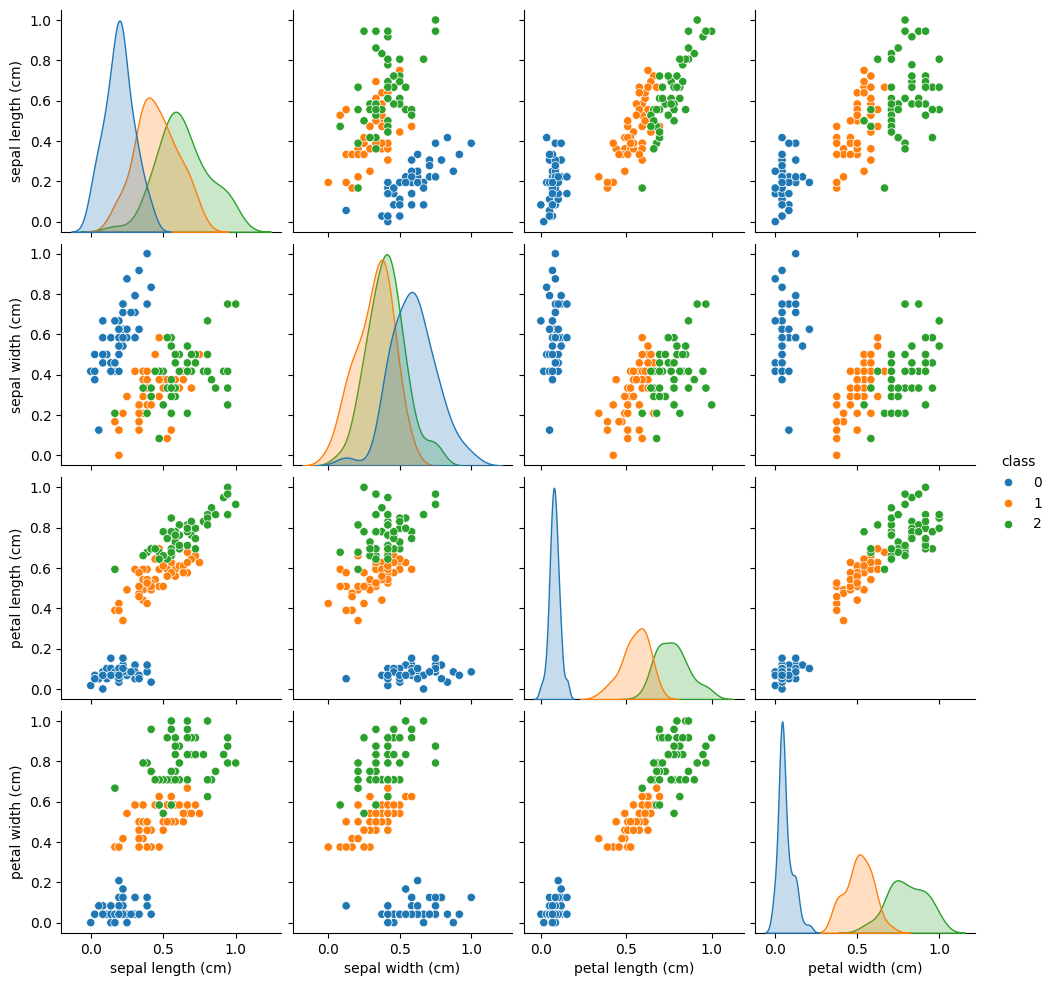

In [ ]:
# plotting
# ----------------------
import pandas as pd
import seaborn as sns

df = pd.DataFrame(features, columns=iris_data.feature_names)
df['class'] = pd.Series(iris_data.target)

sns.pairplot(df, hue='class', palette='tab10')

##### **2. training a classical ML model**

---

In [ ]:

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(features, labels, train_size=0.75)

In [ ]:

from sklearn.svm import SVC
svc = SVC()
_ = svc.fit(train_data, train_labels)

train_score_svc = svc.score(train_data, train_labels)
test_score_svc = svc.score(test_data, test_labels)

print(f'train score: {train_score_svc:.2f}')
print(f'test score: {test_score_svc:.2f}')

train score: 0.97
test score: 0.95


##### **3. training a quantum ML model**

---

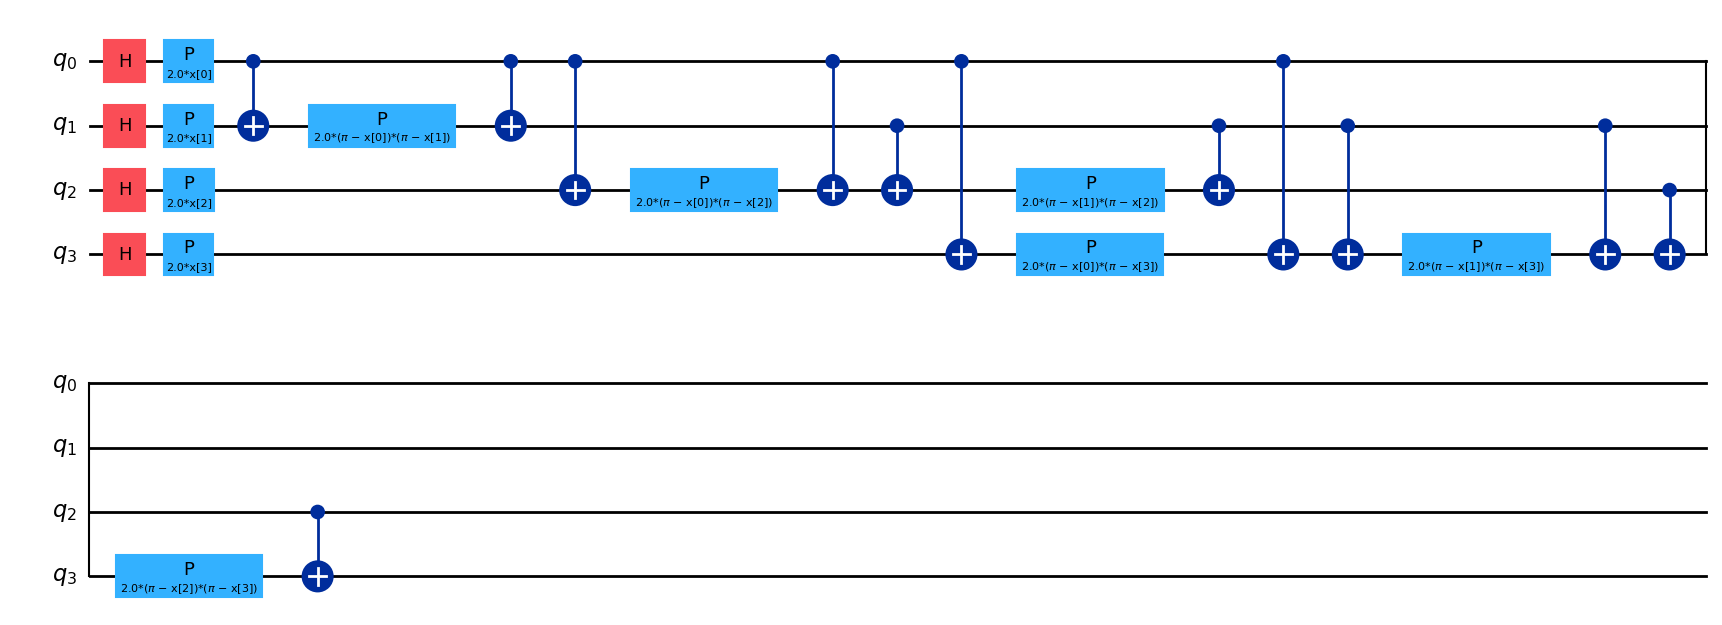

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]
feature_map = ZZFeatureMap(
    feature_dimension=num_features,
    reps=1
)

feature_map.decompose().draw('mpl')

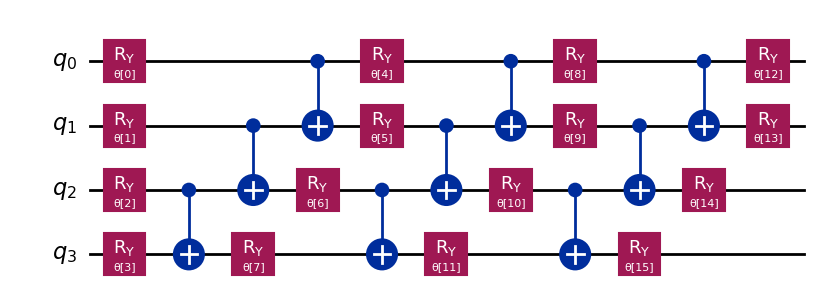

In [ ]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(
    num_qubits=feature_map.num_qubits,
    reps=3
)

ansatz.decompose().draw('mpl')

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
plt.rcParams['figure.figsize'] = (12, 6)


obj_vals=[]
def callback_func(weight, value):
    obj_vals.append(value)

    clear_output(wait=True)

    plt.plot(obj_vals)
    plt.title('Loss during training')
    plt.ylabel('Loss')
    plt.xlabel('Iteration')
    plt.show()


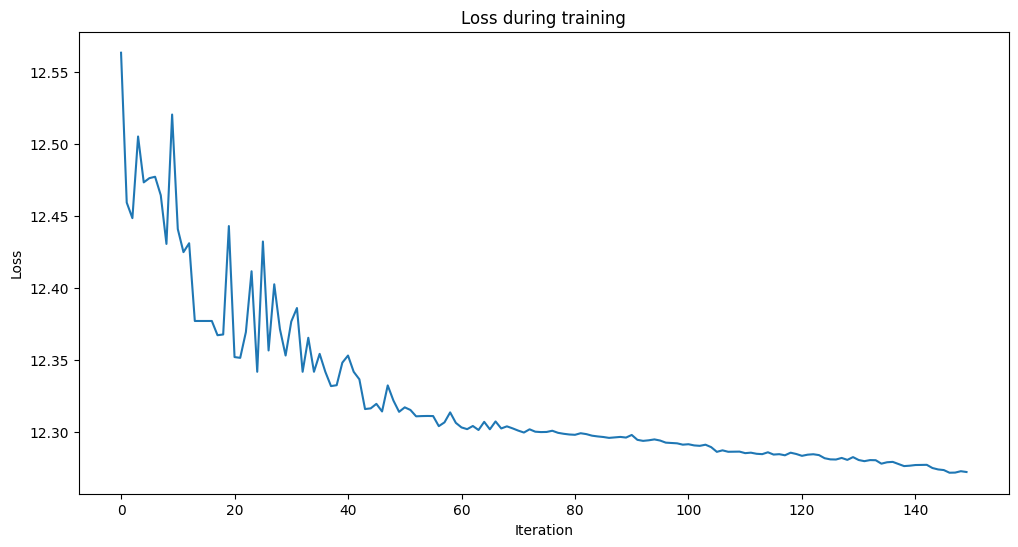

training completed in 69seconds


In [ ]:
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms import VQC
import time

# setup VQC => optimizer, sampler, VQC, callback function
optimizer = COBYLA(maxiter=150)
Sampler = Sampler()

# setup vqc
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    sampler=Sampler,
    callback=callback_func
)

# training vqc
obj_vals = []

start = time.time()
vqc.fit(train_data, train_labels)
end = time.time() - start

print(f'training completed in {round(end)}seconds')

In [ ]:
train_score_vqc = vqc.score(train_data, train_labels)
test_score_vqc = vqc.score(test_data, test_labels)

print(f'train score: {train_score_vqc:.2f}')
print(f'test score: {test_score_vqc:.2f}')

train score: 0.62
test score: 0.71


##### **4. Reducing the number of features**

---

In [ ]:
print(features[0])

[0.22222222 0.625      0.06779661 0.04166667]


<Axes: >

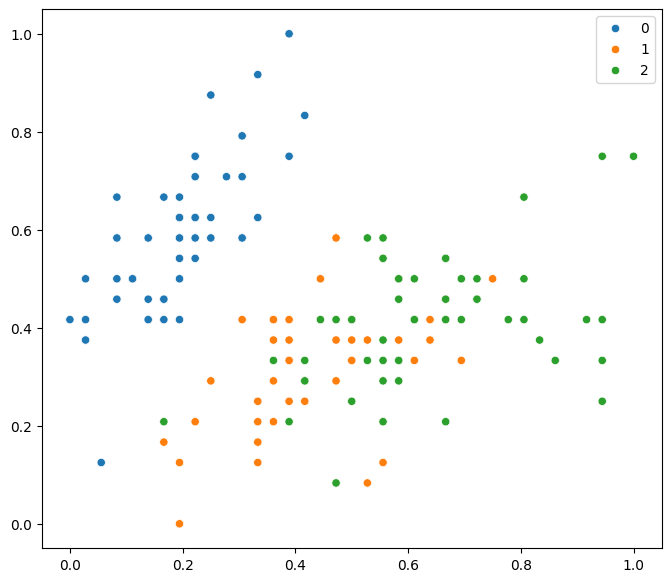

In [ ]:
from sklearn.decomposition import PCA

festures = PCA(n_components=2).fit_transform(features)

plt.rcParams['figure.figsize'] = (8, 7)
# sns.scatterplot(features[:, 0], features[:, 1], hue=labels, palette='tab10')
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=labels, palette='tab10')


In [ ]:
# ------------------------------------
# training a classical ML model
# ------------------------------------
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, train_size=0.75)
svc.fit(train_data, train_labels)

train_score_svc_2 = svc.score(train_data, train_labels)
test_score_svc_2 = svc.score(test_data, test_labels)

print(f'train score: {train_score_svc_2:.2f}')
print(f'test score: {test_score_svc_2:.2f}')

train score: 0.97
test score: 0.95


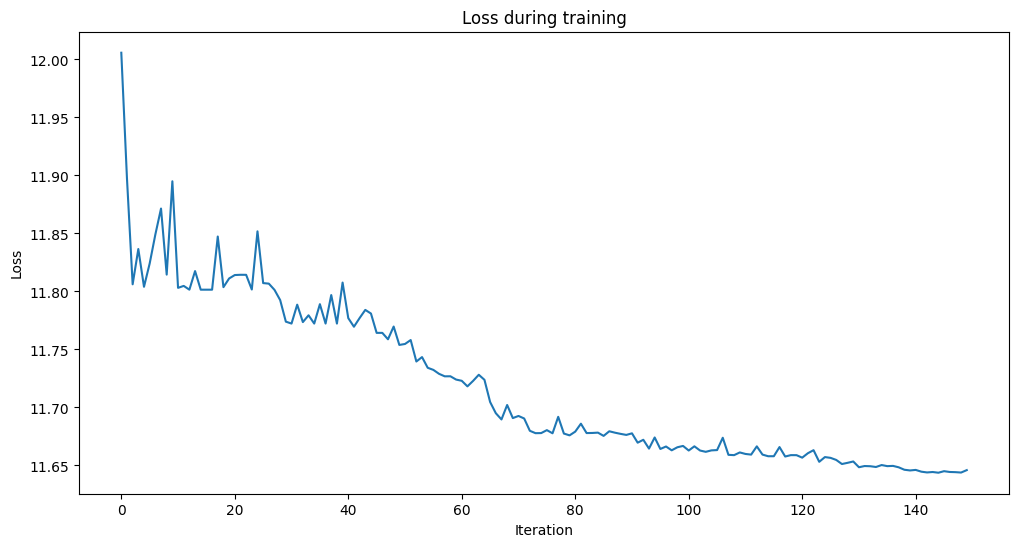

training completed in 70seconds


In [ ]:
# -----------------------------------------------------------------
# training a quantum ML model
# -----------------------------------------------------------------
num_features = features.shape[1]
feature_map = ZZFeatureMap( feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

# setup vqc
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    sampler=Sampler,
    callback=callback_func
)

# training vqc
obj_vals = []

plt.rcParams['figure.figsize'] = (12, 6)
start = time.time()
vqc.fit(train_data, train_labels)
end = time.time() - start

print(f'training completed in {round(end)}seconds')


In [ ]:
train_score_vqc_2_ra = vqc.score(train_data, train_labels)
test_score_vqc_2_ra = vqc.score(test_data, test_labels)

print(f'train score: {train_score_vqc_2_ra:.2f}')
print(f'test score: {test_score_vqc_2_ra:.2f}')

train score: 0.65
test score: 0.63


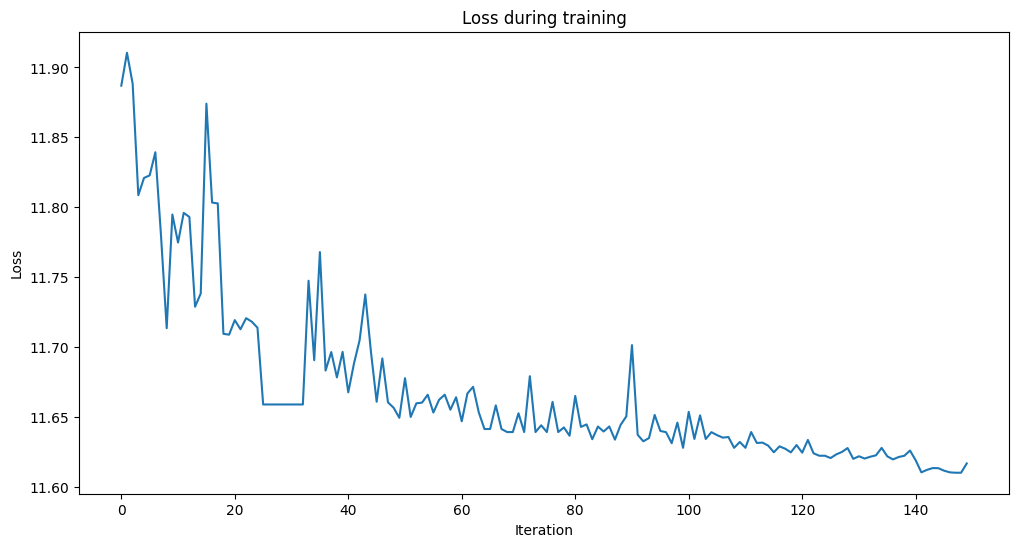

training completed in 83seconds


In [ ]:
# -----------------------------------------------------------------
# training a quantum ML model with EfficientSU2 ansatz
# -----------------------------------------------------------------
from qiskit.circuit.library import EfficientSU2

num_features = features.shape[1]
feature_map = ZZFeatureMap( feature_dimension=num_features, reps=1)
ansatz = EfficientSU2(num_qubits=num_features, reps=3)

# setup vqc
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    sampler=Sampler,
    callback=callback_func
)

# training vqc
obj_vals = []

plt.rcParams['figure.figsize'] = (12, 6)
start = time.time()
vqc.fit(train_data, train_labels)
end = time.time() - start

print(f'training completed in {round(end)}seconds')


In [ ]:
train_score_vqc_2_eff = vqc.score(train_data, train_labels)
test_score_vqc_2_eff = vqc.score(test_data, test_labels)

print(f'train score: {train_score_vqc_2_eff:.2f}')
print(f'test score: {test_score_vqc_2_eff:.2f}')

train score: 0.63
test score: 0.66


##### **5. comparison**

---

In [ ]:
print(f"Model                           | Train Score |  Test Score")
print(f"SVC, 4 features                 | {train_score_svc:10.2f}  | {test_score_svc:10.2f}")
print(f"VQC, 4 features, RealAmplitudes | {train_score_vqc:10.2f}  | {test_score_vqc:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_svc_2:10.2f}  | {test_score_svc_2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes | {train_score_vqc_2_ra:10.2f}  | {test_score_vqc_2_ra:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_vqc_2_eff:10.2f}  | {test_score_vqc_2_eff:10.2f}")

Model                           | Train Score |  Test Score
SVC, 4 features                 |       0.97  |       0.95
VQC, 4 features, RealAmplitudes |       0.62  |       0.71
----------------------------------------------------------
SVC, 2 features                 |       0.97  |       0.95
VQC, 2 features, RealAmplitudes |       0.65  |       0.63
VQC, 2 features, EfficientSU2   |       0.63  |       0.66


---